# Introduction

This notebook provides a basic data visualisation tutorial using Matplotlib (MPL) and Seaborn python library. Please refer to the table below to navigate through the notebook.

## Table of Contents

1. [Matplotlib Basics](#matplotlib-basics)
2. [Importing Libraries](#libraries)
3. [Dataset](#dataset)
3. [Scatterplot](#scatter)
    * [MPL Styling: Adding different markers](#scatter-styling-markers)
    * [MPL Styling: Customise color](#scatter-styling-color)
4. [Bar Chart](#bar)
    * [Useful Functions (getattr and operator)](#bar-useful)
5. [Histogram](#histogram)
6. [Line](#line)
    * [MPL Styling: Line Styling](#line-styling)
    * [MPL Styling: Colourmap](#line-styling-colourmap)
7. [Seaborn](#seaborn)
   * [Basic Plots](#seaborn-basics)
   * [Other Plots](#seaborn-others)

# Plotting libraries

We mention a few plotting libraries:

- [Matplotlib/pyplot](https://matplotlib.org/3.1.1/gallery/index.html) is for basic plotting, it is the classic library that can do 80% of your plots
    - [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) wraps this to make it easier with dataframes
    - [Geopandas](https://geopandas.org/gallery/index.html) adds maps
    - [Seaborn](https://seaborn.pydata.org/examples/index.html) is for statistical visualization 
- [Holoviews](http://holoviews.org/gallery/index.html) - very high-level tool for interactive dashboards and large data (when using datashader backend). Not as well-suited to making figures for publication.
    - [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html) is usefull for interactive plotting but because it's browser based, it can struggle with large amounts of data, unless you use server-based plotting. We will use it as a Holoviews backend but it's worth looking into by itself.
    - Datashader is useul for plotting large quantity of data points. We will use it as a holoview backend

But the important thing is to get good at one so you can easily produce plots. Matplotlib is the default choice unless you expect to need interactivity or large datasets.

Most plotting workflows start by finding an example and modifying it. For that we browse the galleries.

 <div class="alert alert-success">
  <h2>Exercise</h2>

  A lot of the work of programming is knowing what to look for and how to look. This is a bit like riding a bike - it's a habit you need to build. We sometimes have blindspots where we don't know the right jargon, or stop because we get tired or overwhelmed with unfamiliar information.
    
  For this excercise you've been asked to remake this plot in python but you need somewhere to start coding. Find the matplotlib and seaborn galleries, then look through for similar plot. Copy the code into a new cell and you are done.
    
  If you're unsure, please expand the hints for keywords and tips of where and how to look.
    
  <img src="./exercise1.png"></img>
      

  <details>
  <summary><b>→ Hints</b></summary>

  * Keywords are important, you are looking for a `heatmap` that is `categorical`
  * You want to go to google `matplotlib gallery` or `seaborn gallery`
  * With information overload don't get bogged down, try a quick scan of the whole page first or a Ctrl-F
 
  </details>

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>

- [matplotlib annotated heatmap](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py)
- [seaborn pairwise correlations](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
- many more

If you found an example and copied the code:  congratulations, you are now a software developer.
    
<img width="200" src="https://effectivesoftwaredesign.files.wordpress.com/2016/05/copying_and_pasting.jpg?w=640"></img>
    
    
  </details>

  </div>

## 1. Matplotlib Basics <a name="matplotlib-basics"></a>

This notebook includes basic instructions about how to create different charts using the libraries Matplotlib and Seaborn. In python, we can use pandas to manipulate the data and import the libraries matplotlib and seaborn to create the charts.


**Note:** <code>%matplotlib inline</code> This line of code sets the matplotlib backend to inline. More information about this [here](https://ipython.readthedocs.io/en/stable/interactive/plotting.html).

From the official documentation:

> With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.


## 2. Importing libraries <a name="libraries"></a>

In [40]:
# Good practice to use short but clear aliases for the imported libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

## 3. Dataset <a name="dataset"></a>

For this section, we will work with the Iris dataset. A classic in Machine Learning and data visualisation!
This is a small but popular dataset from 1936. Each row represents an iris flower, including its species and dimensions of its sepal and petals in centimetres.

More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/iris). Source image from [Wikipedia](https://en.wikipedia.org/wiki/Iris_(plant)). Some of the examples were inspired from this [tutorial](https://github.com/TannerGilbert/Tutorials/blob/master/Introduction%20to%20Data%20Visualization%20in%C2%A0Python/Introduction%20to%20Data%20Visualization%20in%C2%A0Python.ipynb) which is licensed under [MIT](https://github.com/TannerGilbert/Tutorials/blob/master/LICENSE).

This is an Iris (plant):

<img src="iris_measurements.png" width="200"/>

In [41]:
# The library seaborn provides an easy way to test some datasets
# Check the list of datasets available
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [42]:
# For this notebook we will use the popular iris dataset. We can load it using the seaborn library
iris = sns.load_dataset("iris")
# By default the function head() shows only the first 5 rows
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
# We might want to select only the numeric columns
iris_numeric = iris._get_numeric_data()

# and an unbalanced one
iris_unbalanced = iris[iris.petal_width>0.25]

## 4. Scatterplots <a name="scatter"></a>

A scatter plot uses dots to represent values for two different dimensions. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

In [44]:
iris[["sepal_length", "sepal_width"]]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Note: there are a few inferfaces to matplotlib, we will be using [pyplot](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html) which is a high level interface

In [45]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. This must be a
            function ``x = detrend(x)`` accepting and returning an
            `numpy.array`. Default is no normalization.
        
        normed : bool

In [46]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

Text(0, 0.5, 'sepal width')

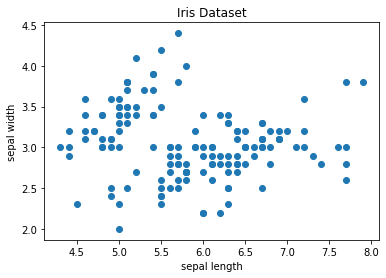

In [47]:
# scatter the sepal.length against the sepal.width
plt.scatter(x=iris["sepal_length"], y=iris["sepal_width"])
# set a title and labels
plt.title("Iris Dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

At the moment, it is hard to know which properties belong to different varieties or classes. By adding some colour or some styling to each data point we can add more meaning the last chart.

### MPL Styling: Adding different markers <a name="scatter-styling-markers"/>

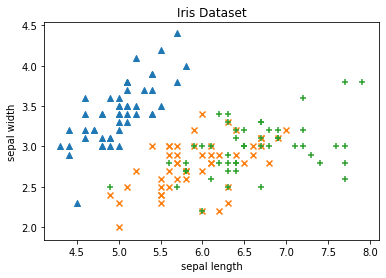

In [48]:
group1 = iris[iris["species"] == "setosa"]
group2 = iris[iris["species"] == "versicolor"]
group3 = iris[iris["species"] == "virginica"]

# scatter the sepal_length against the sepal_width
# By adding a marker MPL will assign some default colours
plt.scatter(x=group1["sepal_length"], y=group1["sepal_width"], marker="^")
plt.scatter(group2["sepal_length"], group2["sepal_width"], marker="x")
plt.scatter(group3["sepal_length"], group3["sepal_width"], marker="+")

# set a title and labels
plt.title("Iris Dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

### MPL Styling: Customise Colour <a name="scatter-styling-color"/>

The basic colours available are:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

We can either use a single letter or write the color name. Let's use subplots and some add some styling.

Text(0, 0.5, 'sepal width')

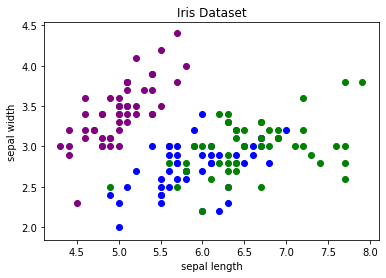

In [49]:
group1 = iris[iris["species"] == "setosa"]
group2 = iris[iris["species"] == "versicolor"]
group3 = iris[iris["species"] == "virginica"]

# scatter the sepal_length against the sepal_width
# By adding a marker MPL will assign some default colours
plt.scatter(x=group1["sepal_length"], y=group1["sepal_width"],color='purple')
plt.scatter(group2["sepal_length"], group2["sepal_width"], c="blue")
plt.scatter(group3["sepal_length"], group3["sepal_width"], c="green")

# set a title and labels
plt.title("Iris Dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

In [50]:
basic_colors = {"setosa": "red", "versicolor": "green", "virginica": "blue"}

In [51]:
# Shape returns the number of rows and columns in the dataset
rows, columns = iris.shape
# Let's create a function that receives a color dictionary as a parameter
# Tip: It is good practice to reuse code as much as possible. Functions in Python are perfect for that !
def display_scatter(colors):
    # create a figure and axis
    fig, ax = plt.subplots()
    
    for species in colors.keys():
        df_species = iris[iris.species == species]
        ax.scatter(
            df_species["sepal_length"],
            df_species["sepal_width"],
            color=colors[species],
            label=species
        )

    # set a title and labels
    ax.set_title("Iris Dataset")
    ax.set_xlabel("sepal length")
    ax.set_ylabel("sepal width")
    plt.legend()

**Note:** Gray shades can be given as a string encoding a float in the 0-1 range. Ranging from black to white.

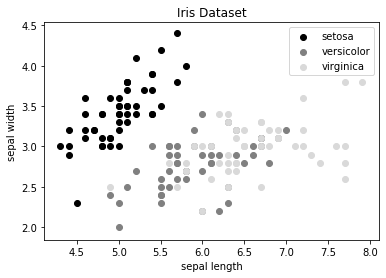

In [52]:
gray_colors = {"setosa": "0", "versicolor": "0.5", "virginica": "0.85"}
display_scatter(gray_colors)

We can also specify custom colours in hexadecimal format. More information about the colour API [here](https://matplotlib.org/2.0.2/api/colors_api.html).

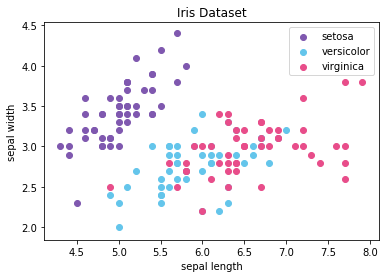

In [53]:
# Create custom color dictionary mapping the specie with a hex colour
custom_colors = {"setosa": "#7F58AF", "versicolor": "#64C5EB", "virginica": "#E84D8A"}
display_scatter(custom_colors)

#### Scatterplot Matrices

Sometimes you might want to plot a scatter matrix which allows you to plot a grid of pairwise relationships in a dataset.

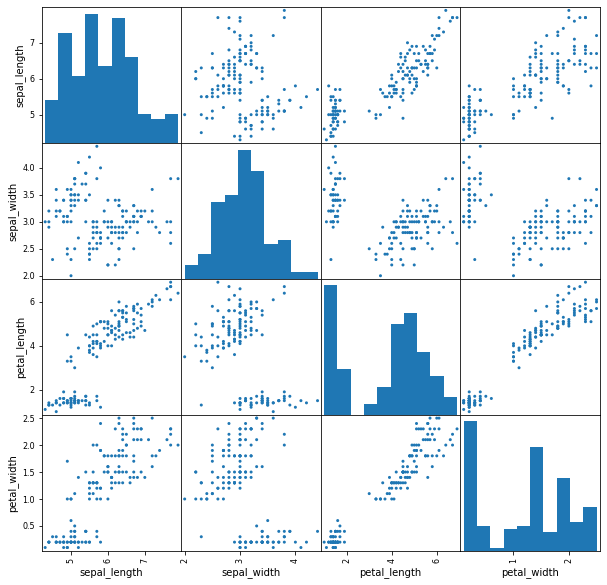

In [54]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(iris, alpha=1, ax=ax)
plt.show()

## 5. Bar Chart <a name="bar"/>

You may have gathered that charts in pyplot are plt.`name`, but we still need to know the arguments. What are the arguments for a bar chart?

In [55]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

In [56]:
# count the occurrence of each species
data = iris_unbalanced["species"].value_counts()
data

versicolor    50
virginica     50
setosa        16
Name: species, dtype: int64

Text(0, 0.5, 'Frequency')

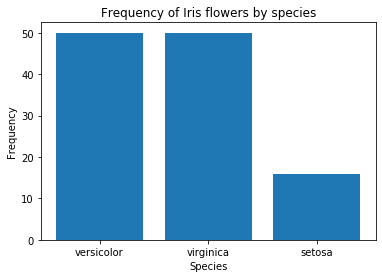

In [57]:
# create a figure and axis
fig, ax = plt.subplots()
# get x and y data
species = data.index
frequency = data.values
# create bar chart
ax.bar(species, frequency)
# set title and labels
ax.set_title("Frequency of Iris flowers by species")
ax.set_xlabel("Species")
ax.set_ylabel("Frequency")

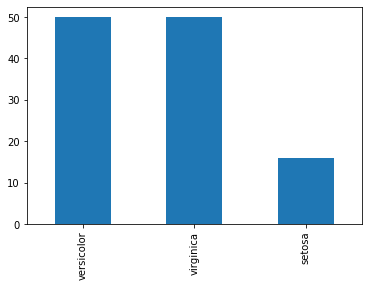

In [58]:
# Or you can use the pandas wrapper
iris_unbalanced["species"].value_counts().plot.bar()

In [59]:
# Let's create another function to display our Bar chart
def display_bar(dataset, colors):
    # create a figure and axis
    fig, ax = plt.subplots()
    # count the occurrence of each specie
    data = dataset["species"].value_counts()
    print(data)

    # For loop to set a color per data point
    for i in range(len(data)):
        # get x and y data
        species = data.index[i]
        frequency = data.loc[species]
        ax.bar(species, frequency, color=colors[species])

    # set title and labels
    ax.set_title("Frequency of Iris flowers by specie")
    ax.set_xlabel("Species")
    ax.set_ylabel("Frequency")

versicolor    50
virginica     50
setosa        16
Name: species, dtype: int64
versicolor    50
virginica     50
setosa        16
Name: species, dtype: int64
versicolor    50
virginica     50
setosa        16
Name: species, dtype: int64


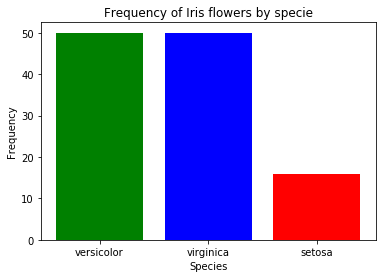

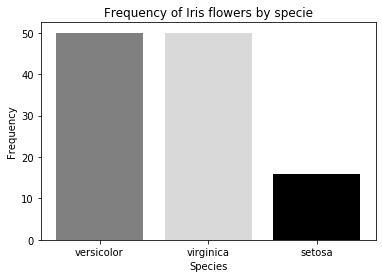

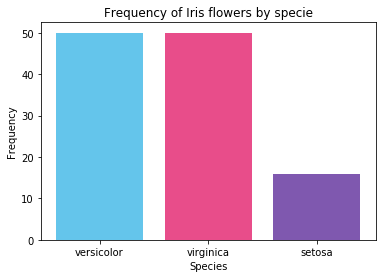

In [60]:
display_bar(iris_unbalanced, basic_colors)
display_bar(iris_unbalanced, gray_colors)
display_bar(iris_unbalanced, custom_colors)

Now let's try to create a more useful bar chart. Imagine that you are interested to see the frequency of iris flowers which have a minimum length (given in centimeters)

In [61]:
def iris_minimum_sepal_length(length_cm):
    # use reset index to map correctly the new indices for the new dataset we are creating
    return iris[iris["sepal_length"] >= length_cm].reset_index(drop=True)

iris_minimum_sepal_length(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,5.0,3.4,1.5,0.2,setosa
4,5.4,3.7,1.5,0.2,setosa
...,...,...,...,...,...
123,6.7,3.0,5.2,2.3,virginica
124,6.3,2.5,5.0,1.9,virginica
125,6.5,3.0,5.2,2.0,virginica
126,6.2,3.4,5.4,2.3,virginica


versicolor    49
virginica     49
setosa        30
Name: species, dtype: int64


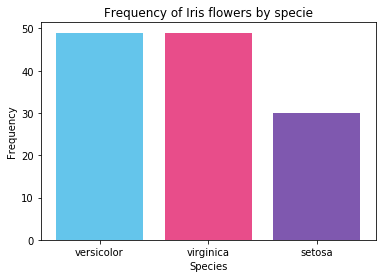

In [62]:
display_bar(iris_minimum_sepal_length(5), custom_colors)

virginica     12
versicolor     1
Name: species, dtype: int64


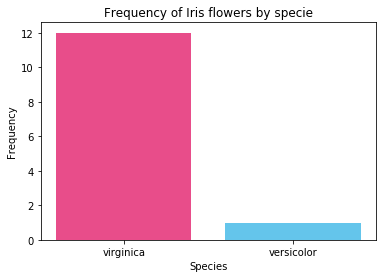

In [63]:
display_bar(iris_minimum_sepal_length(7), custom_colors)

# 6. Histograms <a name="histogram"/>

According to [Wikipedia](https://en.wikipedia.org/wiki/Histogram): 
> A histogram is an approximate representation of the distribution... To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.

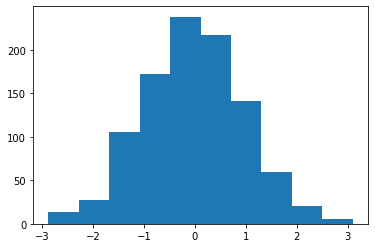

In [64]:
# Fix the seed for reproducibility
np.random.seed(2020)

# Let's generate a random list of numbers with a normal distribution
x = np.random.normal(size=1000)

# Let's use the pyplot function for a histogram
plt.hist(x, bins=10)
plt.show()


<div class="alert alert-success">
<h3>Exercise</h3>

Let's practice some of the key concepts we have learned so far. Using the same data in <code>x</code> for the histogram. Please complete the code below
    
```python
# 1. Create a function that receives the number of bins and allow to plot a histogram


def plot_hist(x, num_bins):
    # COMPLETE CODE HERE
    print("Complete code")


# 2. Modify the last function to plot the histogram for values greater than the standard deviation of the data (`x.std()`).
def plot_hist_gt_std(x, num_bins):
    # COMPLETE CODE HERE
    print("Complete code")

```

<details>
<summary><b>→ Hints</b></summary>

* You already have x from above
* To get rows greater than 1 std dev, look at the `iris_minimum_sepal_length` code above. `df[df<df.std()]`
* Call the functions above with x, and the number of bins

</details>


<details>
<summary>
<b>→ Solution</b>
</summary>

```python
# 1. Create a function that receives the number of bins and allows to plot a histogram
def plot_hist(x, num_bins):
    print(f"Histogram with {num_bins} bins")
    plt.hist(x, bins=num_bins)
    plt.show()


# 2. Modify the last function to plot the histogram for values greater than the standard deviation of the data.
def plot_hist_gt_std(x, num_bins):
    print(f"Histogram for values greater than {x.std()}")
    # You can use conditional selection in numpy like this:
    above_std = x[x > x.std()]
    plt.hist(above_std, bins=num_bins)
    plt.show()



# Let's test this new functions
plot_hist(x, 10)
plot_hist_gt_std(x, 10)

```

</details>

</div>

## Line Chart <a name="line"/>

Suprisingly it's not plt.line, but plt.plot:

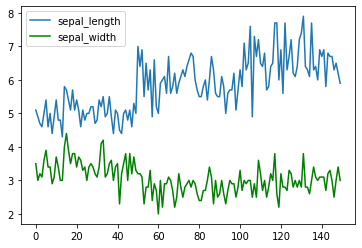

In [65]:
plt.plot(iris.index, iris['sepal_length'], label="sepal_length")
plt.plot(iris.index, iris['sepal_width'], color="green", label="sepal_width")
plt.legend()

Or using the pandas wrapper:

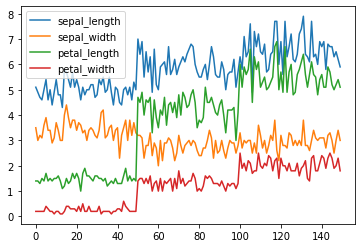

In [66]:
iris_numeric.plot.line()

# MPL Line Styling <a name="line-styling"/>

Now let's do some styling:

More information about linestyling [here](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

No handles with labels found to put in legend.


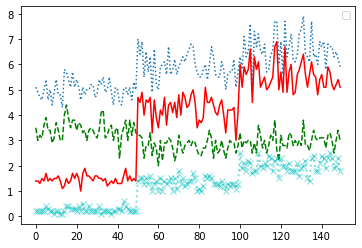

In [67]:
plt.plot(iris['sepal_length'], linestyle="dotted")
plt.plot(iris['sepal_width'], linestyle="--", color="green")
plt.plot(iris['petal_length'], linestyle="-", color="red")
plt.plot(iris['petal_width'], linestyle=":", color="c", linewidth=2, alpha=0.5, marker='x')
plt.legend()

# Pandas plotting

Pandas will handle a lot of the work for you if your dataframe is already clean. This is great if it works, so don't be afraid to try it first.

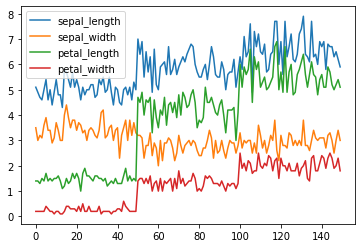

In [68]:
iris.plot()

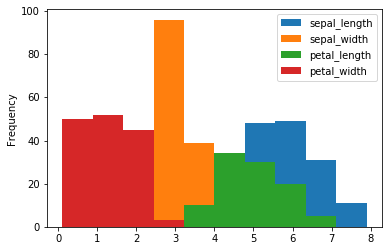

In [69]:
iris.plot.hist()

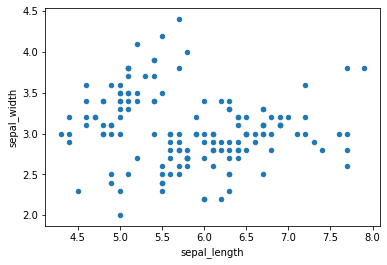

In [70]:
iris.plot.scatter('sepal_length', 'sepal_width')

## Subplots

This lets us combine multiple plots into one

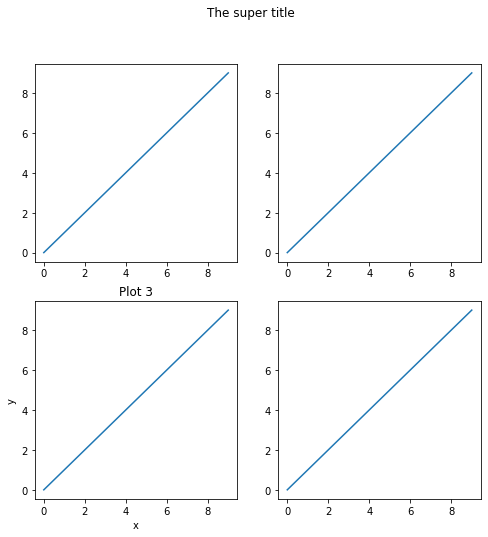

In [71]:
xi = range(10)
yi = range(10)

# Start a figure, with a certain size
plt.figure(figsize=(8, 8))

# For 2 rows and 2 columns of subplots, use subplot 1
plt.subplot(2, 2, 1)
plt.plot(xi, yi)


# activate the next plot
plt.subplot(2, 2, 2)
plt.plot(xi, yi)

plt.subplot(2, 2, 3)
plt.plot(xi, yi)
plt.title('Plot 3')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2, 2, 4)
plt.plot(xi, yi)

plt.suptitle('The super title')
plt.show()

### MPL Styling: Adding Colormaps  and subplots<a name="line-styling-colourmap"/>

Sometimes you want to change to colors for a predefined color palette. MPL supports many color maps that can be specified in any chart using the parameter <code>cmap</code>

We are also using subplots here

Find the complete list of supported colormaps in the [official documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [72]:
# Examples using some colormaps available
colormap_list = ["viridis", "magma", "plasma", "rainbow", "Dark2", "hsv"]


def plot_lines(ax, cmap, df):
    df.plot(kind="line", cmap=cmap, ax=ax)


def plot_multiple_lines(df, colormap_list):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    # Axes.flat is one the methods that allows iterating over the axes in a subplot
    for idx, ax in enumerate(axes.flat):
        cmap = colormap_list[idx]
        plot_lines(ax, cmap, df)
        plt.title(cmap)
    plt.tight_layout()
    plt.show()

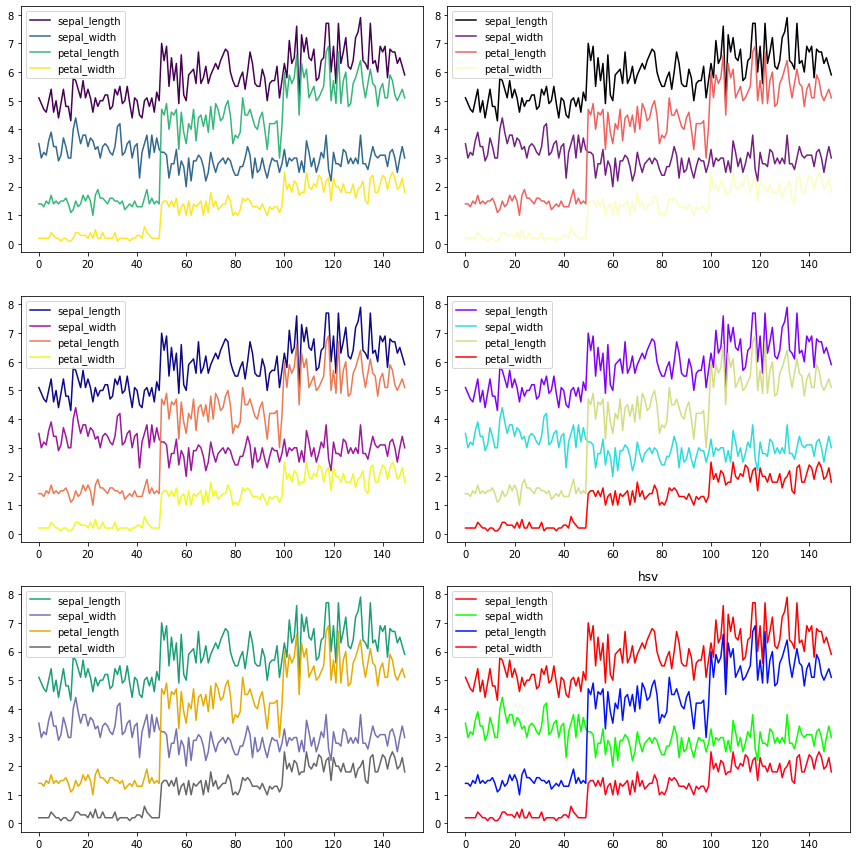

In [73]:
plot_multiple_lines(iris, colormap_list)


<div class="alert alert-success">
<h2>Exercise</h2>

1. Try different values of colormaps for the <code>plot_multiple_lines</code>
2. Modify the function <code>plot_multiple_lines</code> so it shows the plots in 3 columns and 2 rows.


</div>



# Seaborn <a name="seaborn"/>

From the [Seaborn documentation](https://seaborn.pydata.org/)

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Given that this library is based on matplotlib, it is possible to style the plots using some of the styling tricks from matplotlib. However, it provides more advanced plots with less code.


## Seaborn Basic Plots <a name="seaborn-basics"/>

We will start by plotting some of the charts that we have already used in this notebook. We will use some of the example code from the official documentation.

In [80]:
%matplotlib inline

### Scatter plot

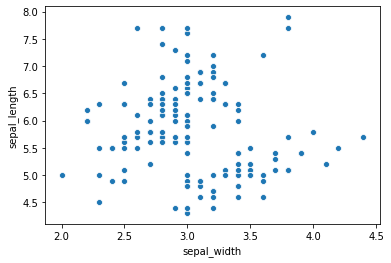

In [81]:
sns.scatterplot(x='sepal_width', y='sepal_length', data=iris)

### Line plot

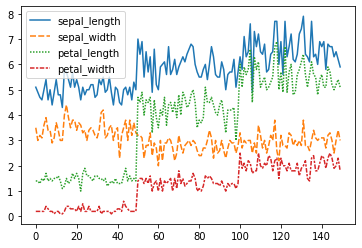

In [93]:
sns.lineplot(data=iris_numeric)
plt.show()

# Notice how seaborn adds by default color and line styles

### Scatter / Pairplot

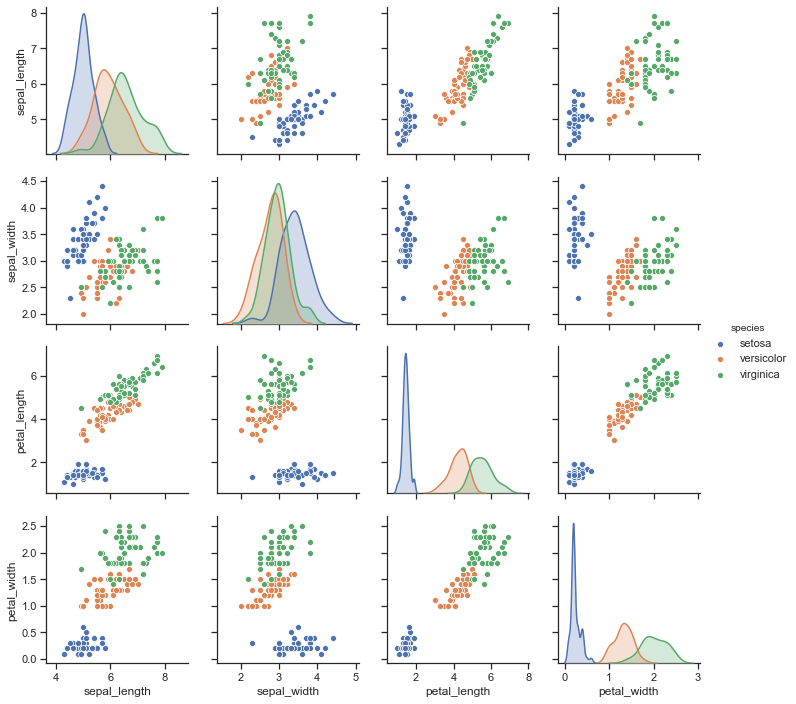

In [94]:
import seaborn as sns

sns.set(style="ticks")
# Pairplot is the equivalent to scatter plots in MPL
sns.pairplot(iris, hue="species")
plt.show()

# Other plots <a name="seaborn-others"/>

### Boxplot

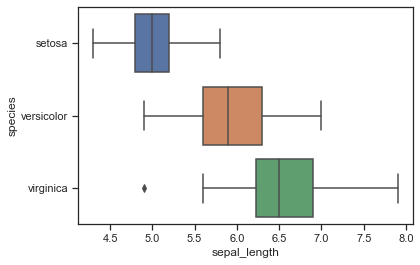

In [95]:
# This plot shows the boxplots w.r.t species and sepal length
df = iris[(iris["sepal_length"] >= 2)]
sns.boxplot("sepal_length", "species", data=df)
plt.show()

### Multiple Linear Regression

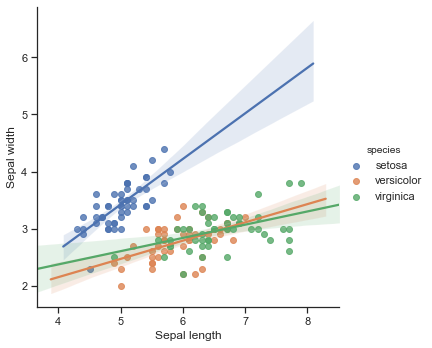

In [96]:
# Plot sepal width as a function of sepal length
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species", height=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length", "Sepal width")
plt.show()

#### Heatmaps

Seaborn have interesting functions to create useful plots such as heatmap

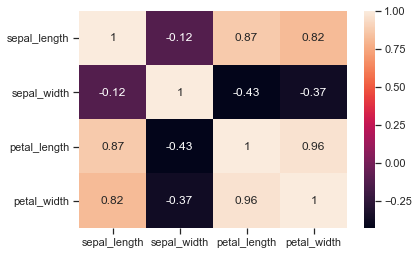

In [97]:
# This heatmap shows the correlation between variables for the iris dataset in just one line of code!
sns.heatmap(iris.corr(), annot=True)
plt.show()

Seaborn provides many more useful plots.

Check some of the examples [here](https://seaborn.pydata.org/tutorial)

## References and further reading
The following sources have been used in the creation of this notebook:
- [Matplotlib documentation](https://matplotlib.org/3.2.2/contents.html)
- [Seaborn documentation](https://seaborn.pydata.org/)
- [Introduction to Data Visualization in Python](https://github.com/TannerGilbert/Tutorials/blob/master/Introduction%20to%20Data%20Visualization%20in%C2%A0Python/Introduction%20to%20Data%20Visualization%20in%C2%A0Python.ipynb)

Many more examples:

- [Seaborn examples](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib examples](https://matplotlib.org/3.2.2/tutorials/introductory/sample_plots.html)
- [3D Plotting](https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725)